In [1]:
import numpy as np

logname = "../logs-weight.txt"
# logname = "../logs9.txt"


def filter_rule(s):
    return "binary_logloss" in s

def filter_time(s):
    return "Tree" in s

def extract(s):
    if filter_rule(s):
        elem = s.strip().split()
        size = int(elem[0][1:-1])
        train_loss = float(elem[3])
        valid_loss = float(elem[6])
        return "rule", (size, train_loss, valid_loss)
    elif filter_time(s):
        elem = s.strip().split()
        ts = float(elem[0][1:-1])
        return "time", (ts,)
    return None, None


ts = []
size = []
train_loss = []
valid_loss = []
with open(logname) as f:
    for line in f:
        line_type, values = extract(line)
        if line_type == "rule":
            sv, tv, vv = values
            size.append(sv)
            train_loss.append(tv)
            valid_loss.append(vv)
        elif line_type == "time":
            ts.append(values[0])

ts = np.array(ts)
size = np.array(size[:-1])
train_loss = np.array(train_loss[:-1])
valid_loss = np.array(valid_loss[:-1])

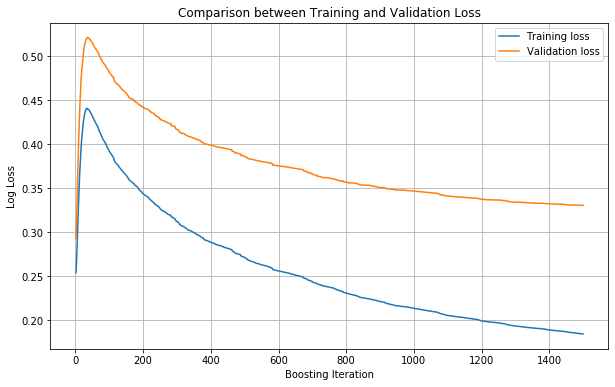

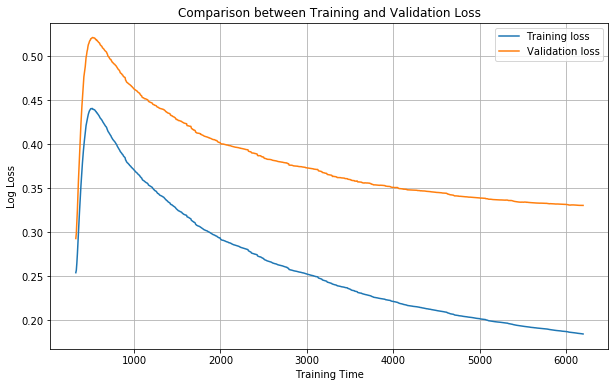

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt


fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(size, train_loss, label="Training loss")
ax.plot(size, valid_loss, label="Validation loss")
ax.grid()
ax.set_xlabel("Boosting Iteration")
ax.set_ylabel("Log Loss")
ax.set_title("Comparison between Training and Validation Loss")
ax.legend();


fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(ts, train_loss, label="Training loss")
ax.plot(ts, valid_loss, label="Validation loss")
ax.grid()
ax.set_xlabel("Training Time")
ax.set_ylabel("Log Loss")
ax.set_title("Comparison between Training and Validation Loss")
ax.legend();

## TODO:

1. Reweight examples based on the number of the records per crew and per region
3. Run training per region
2. Classify groups based on their performance